In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
from height_age_weight_percentiles import *

In [6]:
wt_rec_len_table = build_cdc_stats_table('./weight_for_recumbent_length.csv')

In [7]:
bmi_age_table = build_cdc_stats_table('./bmi_for_age.csv')

In [8]:
bmi_age_table.table

{(1,
  24.0): CDCDataEntry(Sex='1', factor='24.5', L=-1.982373595, M=16.54777487, S=0.080127429),
 (1,
  25.0): CDCDataEntry(Sex='1', factor='25.5', L=-1.924100169, M=16.49442763, S=0.079233994),
 (1,
  26.0): CDCDataEntry(Sex='1', factor='26.5', L=-1.86549793, M=16.44259552, S=0.078389356),
 (1,
  27.0): CDCDataEntry(Sex='1', factor='27.5', L=-1.807261899, M=16.3922434, S=0.077593501),
 (1,
  28.0): CDCDataEntry(Sex='1', factor='28.5', L=-1.750118905, M=16.34333654, S=0.076846462),
 (1,
  29.0): CDCDataEntry(Sex='1', factor='29.5', L=-1.69481584, M=16.29584097, S=0.076148308),
 (1,
  30.0): CDCDataEntry(Sex='1', factor='30.5', L=-1.642106779, M=16.24972371, S=0.075499126),
 (1,
  31.0): CDCDataEntry(Sex='1', factor='31.5', L=-1.592744414, M=16.20495268, S=0.074898994),
 (1,
  32.0): CDCDataEntry(Sex='1', factor='32.5', L=-1.547442391, M=16.16149871, S=0.074347997),
 (1,
  33.0): CDCDataEntry(Sex='1', factor='33.5', L=-1.506902601, M=16.11933258, S=0.073846139),
 (1,
  34.0): CDCDataEn

In [9]:
# Defines variables for the other dataset that I used
nsqip_xl = pd.ExcelFile('~/research/PNSQIP_CPT_abbreviated.xlsx')
nsqip_df = nsqip_xl.parse('Sheet1')


In [10]:

def bmi_zscore_per_row(row):
    """This function is applied to each row, it calculates the Z-score for a given age in months, height, and weight"""
    
    # Loads data from spreadsheet, uses age in months, weight in kg, and length (height) in cm.
    age_mos = age_in_days_to_months(row['AGE_DAYS'])
    weight_kg = row['WEIGHT'] / POUNDS_TO_KG
    length_cm = row['HEIGHT'] * INCHES_TO_CM
    sex = 1 if row['SEX'] == 'Male' else 2
    age_months = age_in_days_to_months(row['AGE_DAYS'])
    
    # handles blanks
    if length_cm < 0 or weight_kg < 0:
        return np.nan
    
    # if less than 2 years old, use weight for recumbent length instead of height
    # (infants can't stand up so they measure them laying down)
    if  age_months < 24:
        try:
            # the variables_for functions return the normal distribution (I think) variables for the 
            v = wt_rec_len_table.variables_for(sex, factor=length_cm)
        except KeyError:
            return np.nan
        
        return float(zscore_for_measurement(weight_kg, v.L, v.M, v.S))
    
    # otherwise, just calculate the standard bmi zscore
    else:
        height_m = length_cm / 100
        bmi = weight_kg / (height_m**2)
        
        v = bmi_age_table.variables_for(sex, factor=age_months)
        return float(zscore_for_measurement(bmi, v.L, v.M, v.S))
        
        

In [11]:
wt_rec_len_table.variables_for(sex=1, factor=46).L

1.041730589

Example z-score for a test row

In [12]:
row = {'AGE_DAYS': 140, 'SEX': 'Male', 'HEIGHT': 24.57, 'WEIGHT': 14.08, }
print(bmi_zscore_per_row(row))

-0.2778220366202706


In [13]:
bmi_zscores = nsqip_df.apply(bmi_zscore_per_row, axis=1)

In [15]:
bmi_zscores = nsqip_df.apply(bmi_zscore_per_row, axis=1)

In [14]:
bmi_zscores.to_excel('~/research/bmis.xlsx')

In [16]:
bmi_zscores

0        2.280611
1        0.216035
2             NaN
3       -1.035150
4        1.693938
5       -1.064177
6             NaN
7             NaN
8       -0.277822
9       -1.749682
10       0.017274
11       1.051316
12            NaN
13            NaN
14       1.547956
15            NaN
16      -0.780941
17       0.150081
18            NaN
19            NaN
20            NaN
21            NaN
22            NaN
23       1.183345
24       1.793342
25      -0.675139
26       1.370563
27       1.860091
28      -0.891088
29       1.563011
           ...   
35753    0.830906
35754   -0.568706
35755   -0.933931
35756         NaN
35757    0.627929
35758    0.104328
35759   -0.071611
35760    0.501702
35761   -1.198074
35762    1.211219
35763    0.425313
35764    1.113217
35765    2.638091
35766   -1.488970
35767   -3.272891
35768    1.350881
35769   -3.159551
35770   -1.078681
35771   -0.052775
35772   -3.290216
35773   -1.006326
35774    0.619430
35775   -2.422109
35776    1.466342
35777    0

In [40]:
bmi_zscores[bmi_zscores < -20]

176      -27.491646
179      -44.410173
232      -43.730948
629     -316.528853
889      -55.395304
1661     -22.776342
1922     -66.727064
2213     -46.814275
3185     -40.936346
3598     -72.707385
5582     -30.724816
5950     -24.165600
9683     -33.489057
10077    -22.988941
15978    -47.169986
16563    -34.100808
17451   -894.280060
17773    -22.349604
18304   -220.414590
20847   -131.130415
21999    -22.810605
26808    -27.601905
27420    -21.247702
28620    -28.212193
31278    -67.604156
32736    -24.646844
34415    -23.916716
dtype: float64

Text(0.5, 1.0, 'BMI')

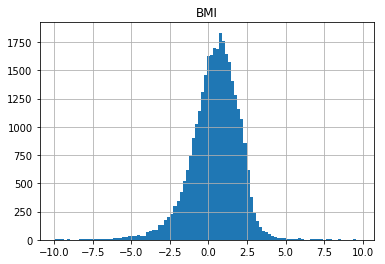

In [43]:
hist_plot = bmi_zscores[(bmi_zscores > -10) & (bmi_zscores < 10)].dropna().hist(bins=100)
hist_plot.set_title('BMI')